# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "../output_data/cities_weather.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
cityList = []
lat = []
long = []
maxTemp = []
humid = []
cloud = []
wind = []
country = []
date = []
x = 0

for city in cities:
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    response = requests.get(query_url)
    weatherData = response.json()
    
    try:
        cityList.append(weatherData['name'])
        print(f"Processing Record {x} | {weatherData['name']}")
        x += 1
    except:
        print('City not found. Skipping...')
    try:
        lat.append(weatherData['coord']['lat'])
    except:
        lat.append(np.nan)
    try:
        long.append(weatherData['coord']['lon'])
    except:
        long.append(np.nan)
    try:
        maxTemp.append(weatherData['main']['temp_max'])
    except:
        maxTemp.append(np.nan)
    try:
        humid.append(weatherData['main']['humidity'])
    except:
        humid.append(np.nan)
    try:
        cloud.append(weatherData['clouds']['all'])
    except:
        cloud.append(np.nan)
    try:
        wind.append(weatherData['wind']['speed'])
    except:
        wind.append(np.nan)
    try:
        country.append(weatherData['sys']['country'])
    except:
        country.append(np.nan)
    try:
        date.append(weatherData['dt'])
    except:
        date.append(np.nan)
    
    time.sleep(1)
    

        
        
        
        
      
        
           
          



Processing Record 0 | Hithadhoo
Processing Record 1 | Norman Wells
Processing Record 2 | Samarai
City not found. Skipping...
Processing Record 3 | Longyearbyen
Processing Record 4 | Ushuaia
Processing Record 5 | Atlantic City
Processing Record 6 | Gigmoto
Processing Record 7 | Cape Town
Processing Record 8 | Saint-Philippe
Processing Record 9 | Moyale
Processing Record 10 | Albany
Processing Record 11 | Mataura
Processing Record 12 | Kruisfontein
Processing Record 13 | Butaritari
City not found. Skipping...
Processing Record 14 | Kumul
Processing Record 15 | Jamestown
Processing Record 16 | Mwingi
Processing Record 17 | Vaini
Processing Record 18 | Saldanha
City not found. Skipping...
Processing Record 19 | Pitimbu
Processing Record 20 | Bethel
Processing Record 21 | Punta Arenas
Processing Record 22 | San Patricio
Processing Record 23 | Kapaa
Processing Record 24 | Hermanus
City not found. Skipping...
City not found. Skipping...
Processing Record 25 | Busselton
Processing Record 26 | 

Processing Record 232 | Kasungu
Processing Record 233 | Mana
Processing Record 234 | Makakilo City
Processing Record 235 | Fairbanks
City not found. Skipping...
Processing Record 236 | Sisimiut
Processing Record 237 | Kisangani
Processing Record 238 | Half Moon Bay
Processing Record 239 | Mareeba
City not found. Skipping...
Processing Record 240 | Xinmin
Processing Record 241 | Helena
Processing Record 242 | East London
Processing Record 243 | Caucayá
Processing Record 244 | Beloha
Processing Record 245 | Touros
Processing Record 246 | Rach Gia
Processing Record 247 | Ankazoabo
Processing Record 248 | Saraland
Processing Record 249 | Port Hardy
Processing Record 250 | Te Anau
Processing Record 251 | Sioux Lookout
Processing Record 252 | Marystown
Processing Record 253 | Rājur
Processing Record 254 | São Domingos
Processing Record 255 | São José da Coroa Grande
Processing Record 256 | Kudryashovskiy
Processing Record 257 | Shingū
Processing Record 258 | Marabu
Processing Record 259 | Pr

City not found. Skipping...
Processing Record 463 | Ostrovnoy
Processing Record 464 | Dalbandin
Processing Record 465 | Port-Gentil
City not found. Skipping...
Processing Record 466 | Iracoubo
Processing Record 467 | San José de Río Tinto
Processing Record 468 | Penzance
City not found. Skipping...
Processing Record 469 | Forécariah
Processing Record 470 | Manoel Urbano
Processing Record 471 | Januária
Processing Record 472 | Sorong
Processing Record 473 | Fernley
Processing Record 474 | Cayenne
Processing Record 475 | Labuan
Processing Record 476 | Kerman
Processing Record 477 | Pocatello
Processing Record 478 | Myitkyina
City not found. Skipping...
Processing Record 479 | Wilmington
Processing Record 480 | Ihosy
Processing Record 481 | Kodinsk
Processing Record 482 | Broome
Processing Record 483 | Cerrito
City not found. Skipping...
Processing Record 484 | Cockburn Town
Processing Record 485 | Mitsamiouli
Processing Record 486 | Shelburne
Processing Record 487 | Bouna
Processing Reco

In [63]:
weatherDict = {
    'City' : cities,
    'Latitude' : lat,
    'Longitude' : long,
    'Maximum_Temp' : maxTemp,
    'Humidity' : humid,
    'Cloudiness' : cloud,
    'Wind_Speed' : wind,
    'Country' : country,
    'Date' : date
}

weatherDf = pd.DataFrame(weatherDict)




### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [64]:
weatherDf.to_csv(output_data_file)



In [68]:
weatherDf

,City,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,81.10,78.0,97.0,8.68,MV,1.627430e+09
1,norman wells,65.2820,-126.8329,69.84,46.0,75.0,5.75,CA,1.627430e+09
2,samarai,-10.6167,150.6667,78.62,87.0,86.0,13.15,PG,1.627430e+09
3,mys shmidta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,longyearbyen,78.2186,15.6401,42.64,93.0,75.0,11.50,SJ,1.627430e+09
...,...,...,...,...,...,...,...,...,...
584,chapais,49.7834,-74.8492,55.72,56.0,100.0,4.94,CA,1.627431e+09
585,lundazi,-12.2929,33.1782,52.88,66.0,28.0,9.06,ZM,1.627431e+09
586,ust-karsk,52.7011,118.8077,64.45,95.0,95.0,2.73,RU,1.627431e+09
587,tahe,52.3333,124.7333,63.84,99.0,100.0,1.48,CN,1.627431e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

100.0

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

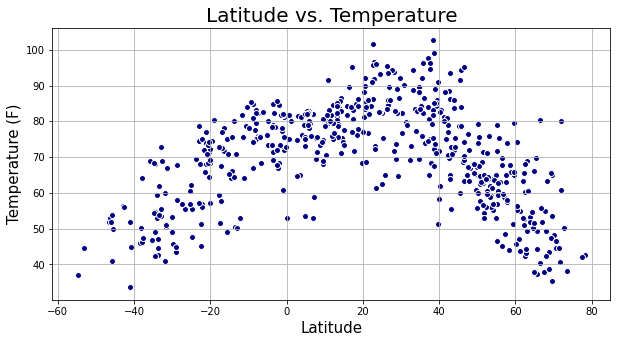

In [86]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Maximum_Temp'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Temperature",fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Temperature (F)", fontsize=15)
plt.grid()

## Latitude vs. Humidity Plot

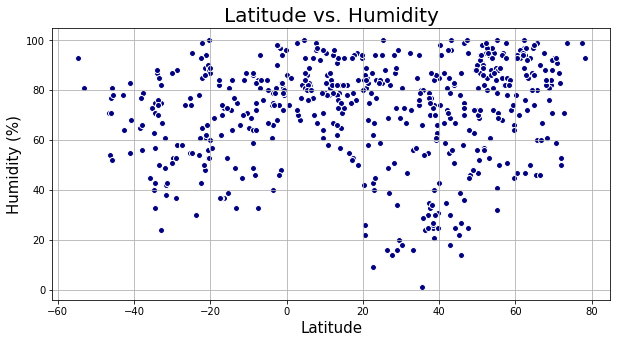

In [87]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Humidity'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Humidity", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.grid()

## Latitude vs. Cloudiness Plot

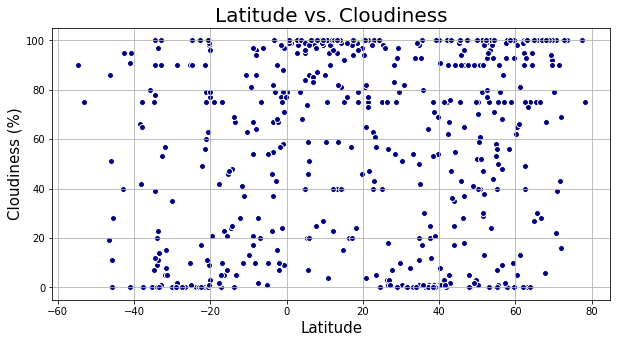

In [88]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Cloudiness'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Cloudiness", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.grid()

## Latitude vs. Wind Speed Plot

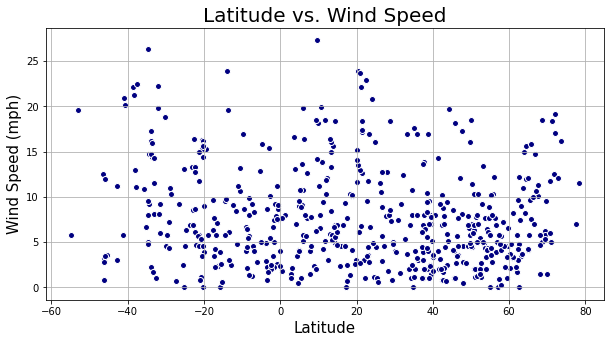

In [89]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Wind_Speed'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Wind Speed", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=15)
plt.grid()

## Linear Regression

In [91]:
maskNorth = weatherDf['Latitude'] >= 0
northDf = weatherDf[maskNorth]
northDf.describe()

,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02
mean,37.785003,11.321823,71.790508,72.580214,61.425134,7.296123,1.627430e+09
std,20.063058,85.879864,14.227003,21.295010,37.372532,5.269026,2.226442e+02
min,0.050000,-179.166700,35.470000,1.000000,0.000000,0.000000,1.627430e+09
25%,20.591000,-69.151025,62.927500,61.250000,25.000000,3.440000,1.627430e+09
50%,39.116700,17.020500,74.095000,79.000000,75.000000,6.040000,1.627430e+09
75%,53.876975,80.975475,82.372500,87.750000,98.000000,10.162500,1.627431e+09
max,78.218600,179.316700,102.630000,100.000000,100.000000,27.290000,1.627431e+09


In [93]:
maskSouth = weatherDf['Latitude'] < 0
southDf = weatherDf[maskSouth]
southDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 585
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          166 non-null    object 
 1   Latitude      166 non-null    float64
 2   Longitude     166 non-null    float64
 3   Maximum_Temp  166 non-null    float64
 4   Humidity      166 non-null    float64
 5   Cloudiness    166 non-null    float64
 6   Wind_Speed    166 non-null    float64
 7   Country       166 non-null    object 
 8   Date          166 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.0+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3894473259184758


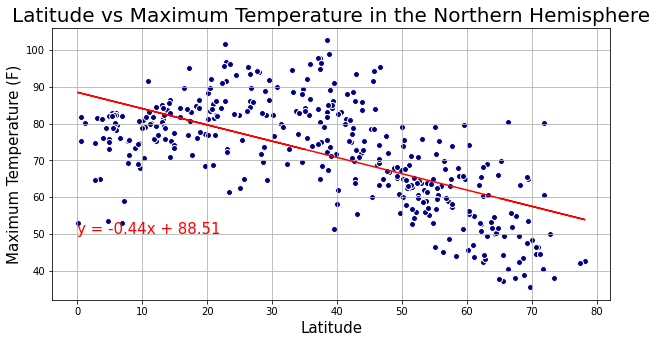

In [99]:
x_values = northDf['Latitude']
y_values = northDf['Maximum_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Latitude vs Maximum Temperature in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Maximum Temperature (F)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5689598038428478


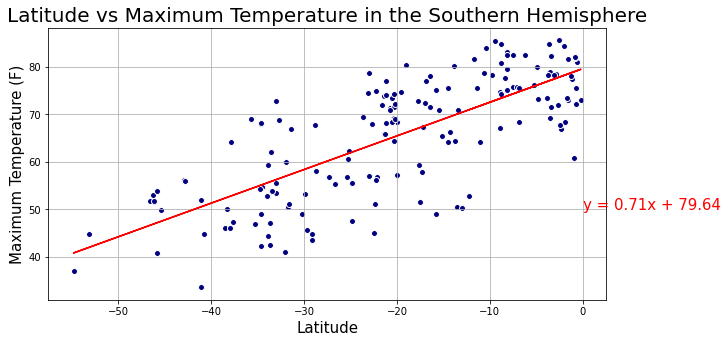

In [100]:
x_values = southDf['Latitude']
y_values = southDf['Maximum_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Latitude vs Maximum Temperature in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Maximum Temperature (F)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010546210004847103


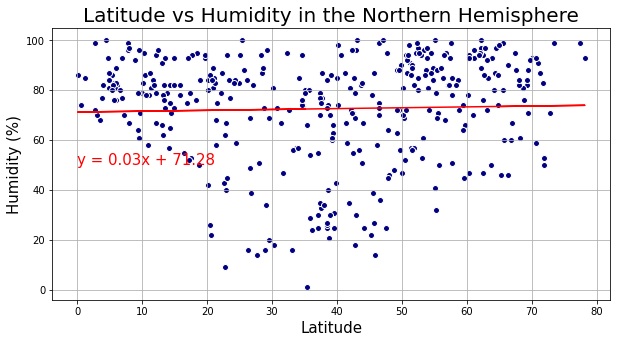

In [101]:
x_values = northDf['Latitude']
y_values = northDf['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Latitude vs Humidity in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.026240949199593824


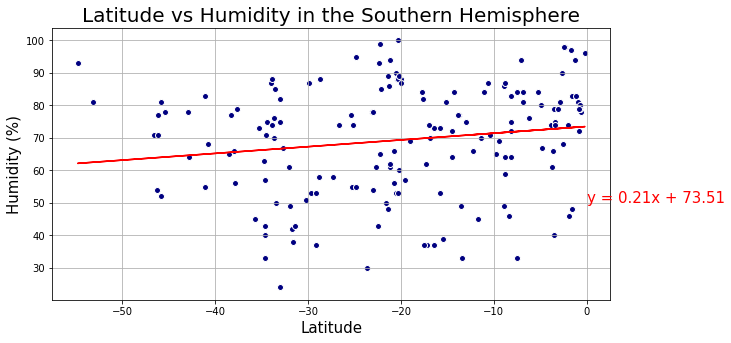

In [102]:
x_values = southDf['Latitude']
y_values = southDf['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Latitude vs Humidity in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005621645601409958


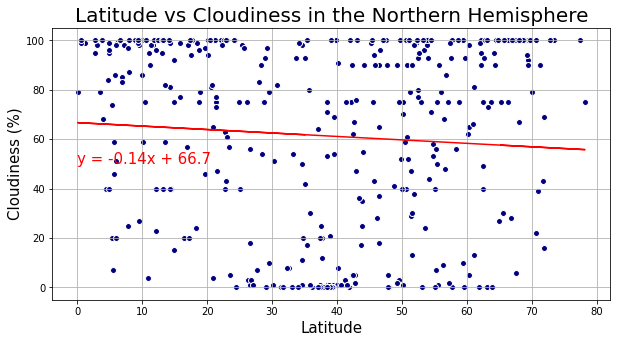

In [103]:
x_values = northDf['Latitude']
y_values = northDf['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010761788793421965


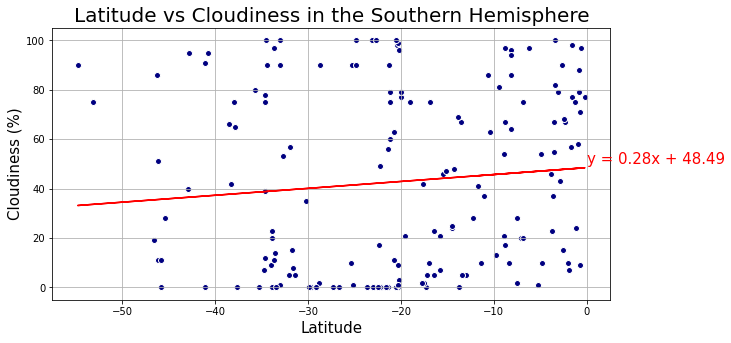

In [104]:
x_values = southDf['Latitude']
y_values = southDf['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016267951846622754


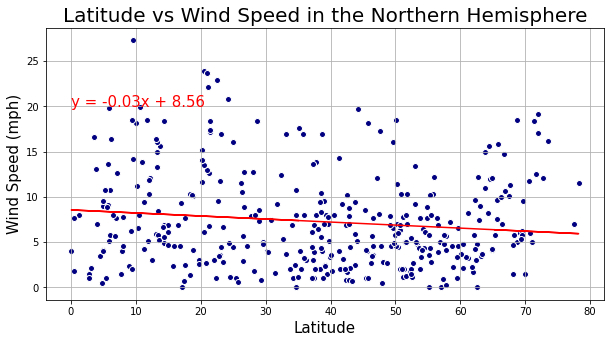

In [106]:
x_values = northDf['Latitude']
y_values = northDf['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (mph)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08228372041503858


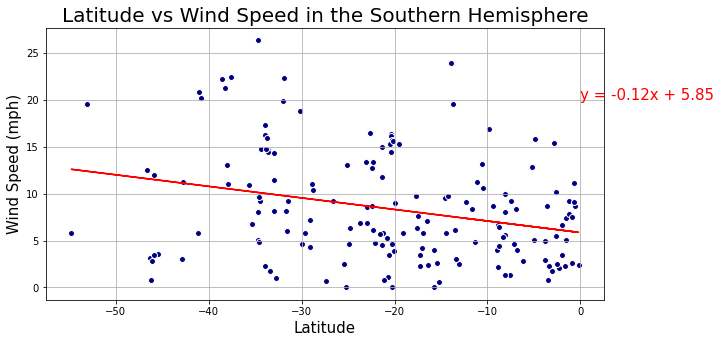

In [107]:
x_values = southDf['Latitude']
y_values = southDf['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (mph)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()